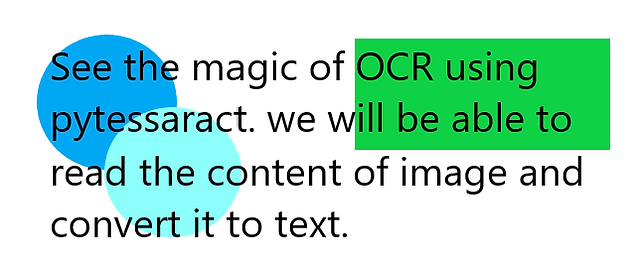

In [22]:
from PIL import Image
image =  Image.open("Noisy_OCR.PNG")
display(image)

In [23]:
# let's see if OCR will work on this noisy image
import pytesseract
text = pytesseract.image_to_string(Image.open("Noisy_OCR.PNG"))
print(text)

See the magic of
pytessaract. we
read the content of image and
convert it to text.




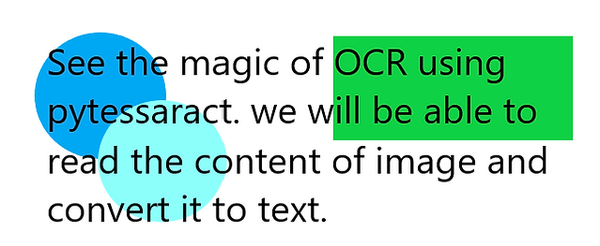

See the magic of

pytessaract. we

read the content of image and
convert it to text.




In [24]:
import PIL
basewidth = 600
img = Image.open("Noisy_OCR.PNG")
# We want to get the correct aspect ratio, so we can do this by taking the base width and dividing
# it by the actual with of the image
wpercent = (basewidth / float(img.size[0]))
# with that ratio we can just get the appropriate height of the image.
hsize = int((float(img.size[1]) * float(wpercent)))
# resize the image. antialiasing is a specific way of resizing lines to try and make them appear smooth
img = img.resize((basewidth, hsize), Image.Resampling.LANCZOS)
img.save('resized_nois.png')
display(img)
# run OCR
text = pytesseract.image_to_string(Image.open('resized_nois.png'))
print(text)

In [30]:
# Conver the image to greyscale
img = Image.open('Noisy_OCR.PNG')
img = img.convert('L')
img.save('greyscale_noise.jpg')
text = pytesseract.image_to_string(Image.open('greyscale_noise.jpg'))
print(text)

magic of
Saract. we
read the content of image and
convert it to text.




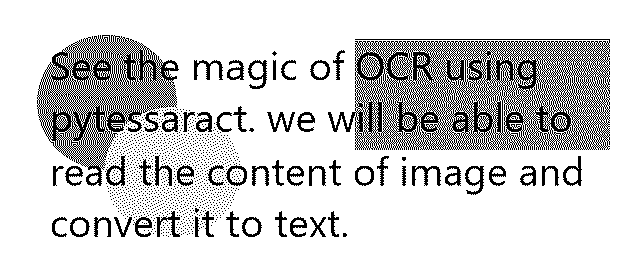

In [33]:
# Open the noisy image and convert it using binarization
img = Image.open('Noisy_OCR.PNG').convert('1')
img.save('black_white_noise.jpg')
display(img)

Trying with threshold 0


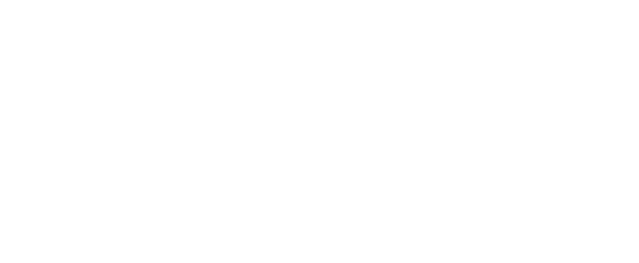


Trying with threshold 64


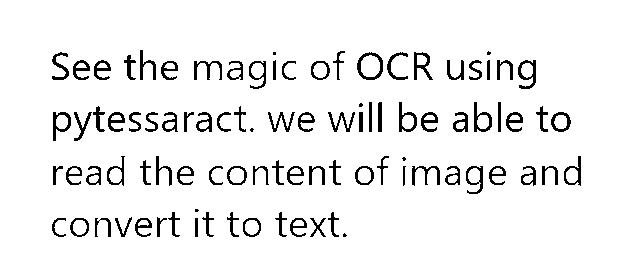

See the magic of OCR using
pytessaract. we will be able to
read the content of image and
convert it to text.

Trying with threshold 128


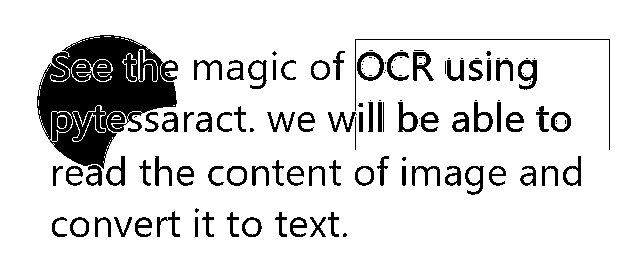

magic of OCR using
fyeessaract. we will be able to
read the content of image and
convert it to text.

.
@ tin


Trying with threshold 192


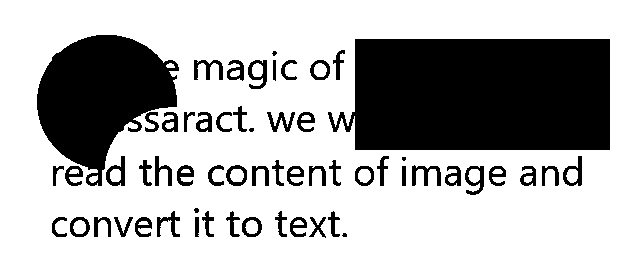

magic of
Saract. we
read the content of image and
convert it to text.


Trying with threshold 256


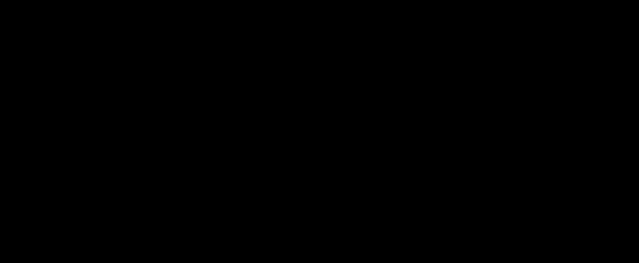

In [34]:
def binarize(image_to_transform, threshold):
    # Convert image to a single greyscle image using convert()
    output_image=image_to_transform.convert("L")
    # The threshold value is usually provided as a numebr between 0 and 255, whivh is the number of bits in a byte.
    # The algorighm for the binariztation is pretty simple, go through every pixel in the
    #image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # Iterate over all of the pixels in the image we want to work with
    for x in range(output_image.width):
        for y in range(output_image.height):
            # for the given pixel at w, h, lets check its value against the threshold
            if output_image.getpixel((x,y))< threshold: # note that the first parameter is tuple object
                # lets set this to zero
                output_image.putpixel( (x,y), 0 )
            else:
                # otherwise lets set this to 255
                output_image.putpixel( (x,y), 255 )
    return output_image
    
# Test this function over a range of different thresholds.
for thresh in range(0,257,64):
    print("Trying with threshold " + str(thresh))
    display(binarize(Image.open('Noisy_OCR.PNG'), thresh))
    # It's inefficient to binarize it twice but this is just for a demo
    print(pytesseract.image_to_string(binarize(Image.open("Noisy_OCR.PNG"), thresh)))
